In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [78]:
plt.rcParams.update({'font.family':'serif', 'font.size': 24})
plt.rcParams.update({'font.serif':'Times New Roman'})

In [95]:
#loc = 'MARL/results/Jun_12_06_03_34/eval_logs'
loc = 'MARL/results/Jun_14_18_34_25/eval_logs'
reward1 = np.load(loc+'/reward_difficulty_1.npy')
rewardSTD1 = np.load(loc+'/rewardSTD_difficulty_1.npy')

#loc = 'MARL/results/Jun_12_21_53_09/eval_logs'
loc = 'MARL/results/Jun_15_06_46_25/eval_logs'
reward2 = np.load(loc+'/reward_difficulty_2.npy')
rewardSTD2 = np.load(loc+'/rewardSTD_difficulty_2.npy')

loc = 'MARL/results/Jun_13_03_50_39/eval_logs'
reward3 = np.load(loc+'/reward_difficulty_3.npy')
rewardSTD3 = np.load(loc+'/rewardSTD_difficulty_3.npy')
loc = 'MARL/results/Jun_14_02_31_36/eval_logs'
reward3_regional_mask = np.load(loc+'/reward_difficulty_3.npy')
rewardSTD3_regional_mask = np.load(loc+'/rewardSTD_difficulty_3.npy')

In [96]:
def smooth(x, timestamps=10):
    n = len(x)
    y = np.zeros(n)
    for i in range(n):
        start = max(0, i - timestamps)
        y[i] = float(x[start:(i + 1)].sum()) / (i - start + 1)
    return y


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

obs_window = 100

alpha = 0.3
legend_size = 15
line_size_others = 2
line_size_ours = 2
tick_size = 18
label_size = 18

reward1 = smooth(reward1)
reward2 = smooth(reward2)+7.5
reward3 = smooth(reward3)
reward3_regional_mask = smooth(reward3_regional_mask)+7.5

In [98]:
reward1 = reward1/15 
reward2 = reward2/15
reward3 = reward3/15
reward3_regional_mask = reward3_regional_mask/15

In [99]:
rewardSTD1 = rewardSTD1/10 
rewarSTDd2 = rewardSTD2/10
rewardSTD3 = rewardSTD3/10
rewardSTD3_regional_mask = rewardSTD3_regional_mask/10

/tmp/ipykernel_1411546/1383917189.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg0.legendHandles:
/tmp/ipykernel_1411546/1383917189.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg1.legendHandles:
/tmp/ipykernel_1411546/1383917189.py:65: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg2.legendHandles:


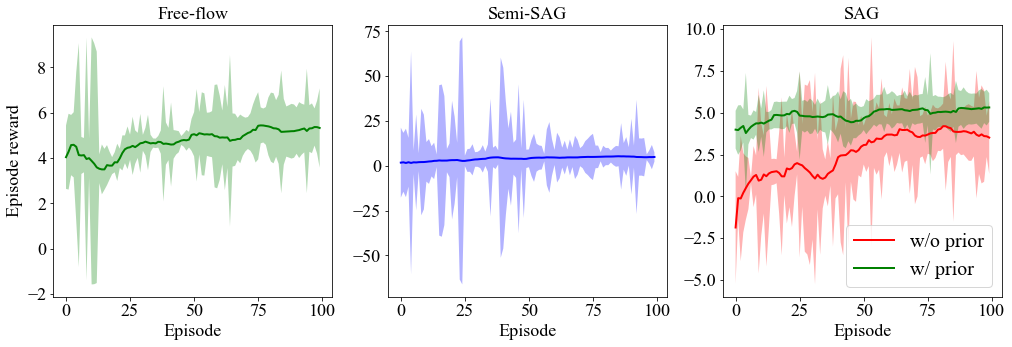

In [100]:
X1 = np.arange(len(reward1))
lower_bound1 = reward1 - rewardSTD1
upper_bound1 = reward1 + rewardSTD1

X2 = np.arange(len(reward2))
lower_bound2 = reward2 - rewardSTD2
upper_bound2 = reward2 + rewardSTD2

X3 = np.arange(len(reward3))
lower_bound3 = reward3 - rewardSTD3
upper_bound3 = reward3 + rewardSTD3
lower_bound3RM = reward3_regional_mask - 0.6*rewardSTD3_regional_mask
upper_bound3RM = reward3_regional_mask + 0.6*rewardSTD3_regional_mask

fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(17, 5))
ax0.set_title('Free-flow', size=label_size)
ax0.plot(X1, reward1, lw=line_size_others, label='MAA2C', linestyle='-',
         color='green')
ax0.fill_between(X1, lower_bound1[:obs_window], upper_bound1[:obs_window], color='green', edgecolor='none', alpha=alpha)
#leg0 = ax0.legend(fontsize=legend_size, loc='lower right', ncol=2)
#ax0.set_xlim(0, obs_window)
#ax0.set_ylim(-50, 120)
ax0.tick_params(axis='x', labelsize=tick_size)
ax0.tick_params(axis='y', labelsize=tick_size)
ax0.set_xlabel('Episode', fontsize=label_size)
ax0.set_ylabel('Episode reward', fontsize=label_size)
ax0.ticklabel_format(axis="x")
#ax0.grid()
# set the linewidth of each legend object
for legobj in leg0.legendHandles:
    legobj.set_linewidth(2.0)
    
ax1.set_title('Semi-SAG', size=label_size)
ax1.plot(X2, reward2, lw=line_size_others, label='MAA2C', linestyle='-',
         color='blue')
ax1.fill_between(X2, lower_bound2[:obs_window], upper_bound2[:obs_window], color='blue', edgecolor='none', alpha=alpha)
#leg1 = ax1.legend(fontsize=legend_size, loc='lower right', ncol=2)
#ax0.set_xlim(0, obs_window)
#ax1.set_ylim(-50, 120)
ax1.tick_params(axis='x', labelsize=tick_size)
ax1.tick_params(axis='y', labelsize=tick_size)
ax1.set_xlabel('Episode', fontsize=label_size)
#ax1.set_ylabel('Evaluation reward', fontsize=label_size)
ax1.ticklabel_format(axis="x")
#ax1.grid()
# set the linewidth of each legend object
for legobj in leg1.legendHandles:
    legobj.set_linewidth(2.0)
    
ax2.set_title('SAG', size=label_size)
ax2.plot(X3, reward3, lw=line_size_others, label='w/o prior', linestyle='-', color='red')
ax2.fill_between(X3, lower_bound3[:obs_window], upper_bound3[:obs_window], color='red', edgecolor='none', alpha=alpha)
ax2.plot(X3, reward3_regional_mask, lw=line_size_others, label='w/ prior', linestyle='-', color='green')
ax2.fill_between(X3, lower_bound3RM[:obs_window], upper_bound3RM[:obs_window], color='green', edgecolor='none', alpha=alpha)
leg2 = ax2.legend(fontsize=20, loc='lower right', ncol=1)
#ax0.set_xlim(0, obs_window)
#ax2.set_ylim(-50, 120)
ax2.tick_params(axis='x', labelsize=tick_size)
ax2.tick_params(axis='y', labelsize=tick_size)
ax2.set_xlabel('Episode', fontsize=label_size)
#ax2.set_ylabel('Evaluation reward', fontsize=label_size)
ax2.ticklabel_format(axis="x")
#ax2.grid()
# set the linewidth of each legend object
for legobj in leg2.legendHandles:
    legobj.set_linewidth(2.0)